# Spam Classification in the comments on YouTube

In [122]:
import string 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas_profiling
import nltk
#nltk.download('wordnet')
from nltk import word_tokenize, sent_tokenize, WordNetLemmatizer
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers, losses, metrics, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from livelossplot import PlotLossesKeras
from sklearn.model_selection import GridSearchCV

dataset from kaggle: https://www.kaggle.com/goneee/youtube-spam-classifiedcomments

In [2]:
def text_process(text):
    text = text.translate(str.maketrans('','',string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

In [3]:
data = pd.concat(map(pd.read_csv,['Youtube01-Psy.csv', 'Youtube02-KatyPerry.csv', 'Youtube03-LMFAO.csv',
                                  'Youtube04-Eminem.csv', 'Youtube05-Shakira.csv']))

In [96]:
data.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [95]:
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 91.7+ KB


In [6]:
#leaved only important feature
data = data.drop(["COMMENT_ID", "DATE", "AUTHOR"],axis=1)
data = data.fillna(data.mean())

In [97]:
y = data['CLASS']
x = data['CONTENT']

x = x.apply(text_process)
Lem = WordNetLemmatizer()
x = x.apply(Lem.lemmatize)

vect_er = CountVectorizer()
vectX = vect_er.fit_transform(x)

In [98]:
trainX, testX, trainY, testY = train_test_split(vectX,y,test_size=0.2)

In [147]:
#finding best value of hyperparameter
knnn = KNeighborsClassifier()
parameters = {'n_neighbors': list(range(1,20))}
grid_KNN = GridSearchCV(estimator=knnn, param_grid = parameters, cv = 4, n_jobs=-1)
grid_KNN.fit(trainX, trainY)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]})

In [146]:
print("Results from Grid Search " )
print("\nThe best estimator across ALL searched params:\n",grid_KNN.best_estimator_)
print("\nThe best score across ALL searched params:\n",grid_KNN.best_score_)
print("\nThe best parameters across ALL searched params:\n",grid_KNN.best_params_)

Results from Grid Search 

The best estimator across ALL searched params:
 KNeighborsClassifier(n_neighbors=1)

The best score across ALL searched params:
 0.8145780051150895

The best parameters across ALL searched params:
 {'n_neighbors': 1}


### Knn, Logistic regression, Decision tree, Random Forest, SGD

In [135]:
models = {'Knn': KNeighborsClassifier(1), 
          'Logistic regression': LogisticRegression(), 
          'Decision tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(n_estimators=20),
          'SGD': SGDClassifier()}

Knn
Training set score: 1.000000
Test set score: 0.813776
Accuracy: 0.81


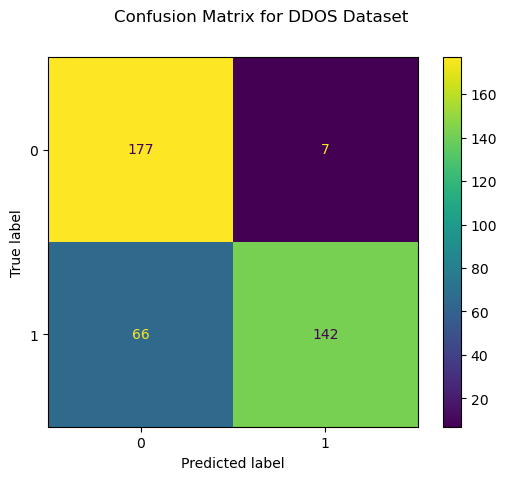

Logistic regression
Training set score: 0.955882
Test set score: 0.915816
Accuracy: 0.92


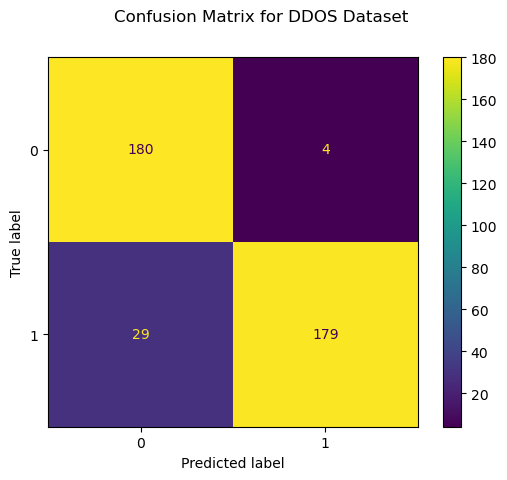

Decision tree
Training set score: 1.000000
Test set score: 0.913265
Accuracy: 0.91


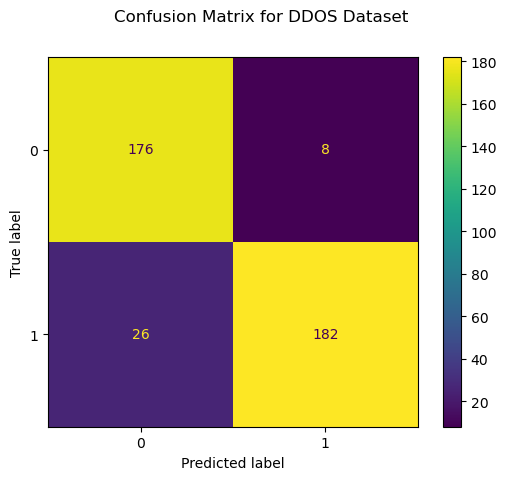

Random Forest
Training set score: 0.988491
Test set score: 0.903061
Accuracy: 0.90


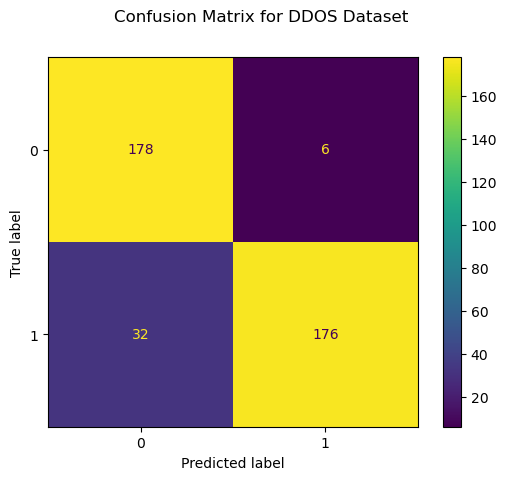

SGD
Training set score: 1.000000
Test set score: 0.897959
Accuracy: 0.90


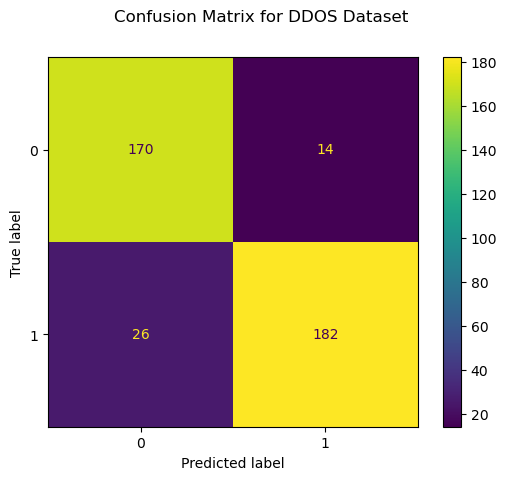

In [142]:
for name, model in models.items():
    print(name)
    model.fit(trainX,trainY)
    print("Training set score: %f" % model.score(trainX, trainY))
    print("Test set score: %f" % model.score(testX, testY))
    y_pred = model.predict(testX)
    print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
    cm = confusion_matrix(testY, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
    disp.plot()
    disp.figure_.suptitle("Confusion Matrix for DDOS Dataset")
    plt.show()

### LSTM

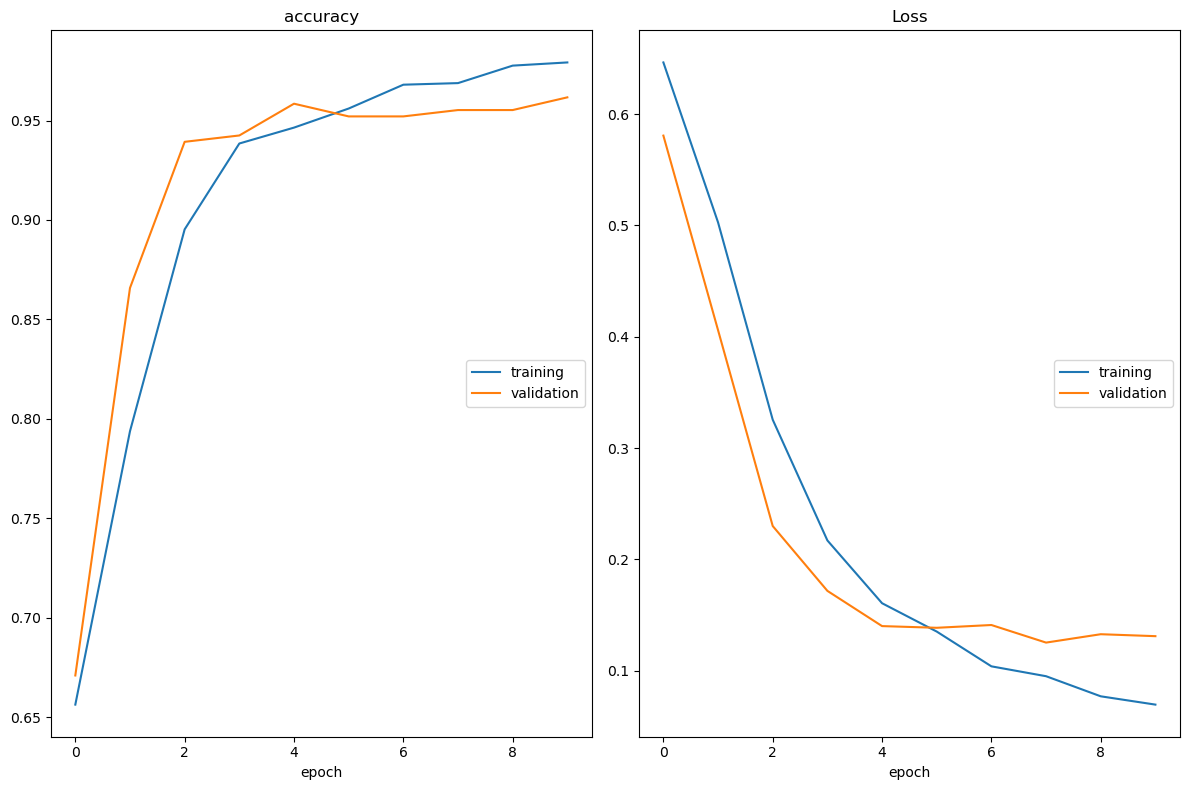

accuracy
	training         	 (min:    0.656, max:    0.979, cur:    0.979)
	validation       	 (min:    0.671, max:    0.962, cur:    0.962)
Loss
	training         	 (min:    0.070, max:    0.646, cur:    0.070)
	validation       	 (min:    0.125, max:    0.581, cur:    0.131)
13/13 [==============================] - 0s 19ms/step - loss: 0.1652 - accuracy: 0.9490
[0.16519802808761597, 0.9489796161651611]


In [92]:

y = data['CLASS']
x = data['CONTENT']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)

trainX, testX, trainY, testY = train_test_split(sequences,y,test_size=0.2)

sequences_matrix = pad_sequences(trainX, maxlen=150)
sequences_matrix_test = pad_sequences(testX, maxlen=150)

classifier = Sequential([
layers.Embedding(input_dim=1000, output_dim=32,
input_length=150),
layers.LSTM(64),
layers.Dense(1, activation='sigmoid')
])
classifier.summary()

classifier.compile(loss=losses.binary_crossentropy,
optimizer=optimizers.RMSprop(), metrics=['accuracy'])
classifier.fit(sequences_matrix, trainY, batch_size=64,
epochs=10, validation_split=0.2,callbacks=[PlotLossesKeras()])

score = classifier.evaluate(sequences_matrix_test, testY)
print(score)

13/13 [==============================] - 0s 13ms/step
Accuracy: 0.95


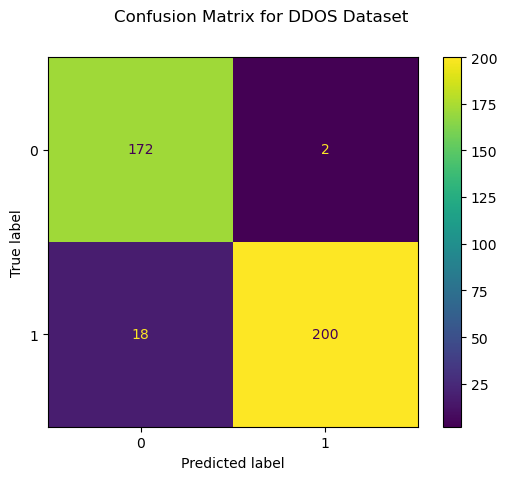

In [94]:
y_pred = np.round(classifier.predict(sequences_matrix_test)).astype(int)
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

cm = confusion_matrix(testY, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.figure_.suptitle("Confusion Matrix for DDOS Dataset")
plt.show()